This is the reproduction of data from NA49 experiment with fixed target and the beam momentum equal 158 GeV

In [327]:
mp = 0.93827               #proton mass
pz = 158.0                 #beam momentum
root_s = 17.27             #sqrt(s)

> ## Generating

In [328]:
import sys

cfg = open('/Users/artyom/Software/pythia/pythia8307/Makefile.inc')
lib = '../lib'

for line in cfg:

    if line.startswith('PREFIX_LIB='): lib = line[11:-1]; break
    
sys.path.insert(0, lib)

import pythia8

In [329]:
pythia = pythia8.Pythia('printBanner = false')

N_events = int(1e7)

ids = [-211, 211, -321, 321]

files = dict(zip(ids, [open(f'data/generated/{id}.csv', 'w') for id in ids]))

for id in ids: files[id].write('pT,xF,E\n')

pythia.readFile('config/config.cmnd')

boost = pythia8.Vec4()
boost.pz(mp * ((1 + (pz / mp) ** 2) ** 0.5 - 1) ** 0.5)
boost.e((boost.pz() ** 2 + mp ** 2) ** 0.5)

pythia.init()

for event in range(N_events):

    if not pythia.next(): continue
    
    entries = pythia.event.size()

    for j in range(entries):

        particle = pythia.event[j]

        id = particle.id()
        
        if abs(int(id)) == 211 or abs(int(id)) == 321:

            P_mu = particle.p()

            P_mu.bstback(boost)

            pT = P_mu.pT()
            xF = 2 * P_mu.pz() / root_s
            E = P_mu.e()

            files[id].write(f'{pT},{xF},{E}\n')

sig_total = pythia.getSigmaTotal()

pythia.stat()

for id in ids: files[id].close()


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 26 Oct 2022 at 16:37:27    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

In [330]:
print(boost) #Почему энергия в CM не равна 17.27?

     0.000     0.000    12.140    12.176 (    0.938)



In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> ## Binning

In [332]:
bins_file = open('config/binning.bin', 'r')

In [333]:
bins = []

for num, line in enumerate(bins_file.readlines()):

    if num % 2 == 0:
        
        a = line.split('|')

        for bin in a:

            bin = bin.replace('(', '').replace(')', '').replace(' ', '')
            bins.append(list(map(float, bin.split(','))))

bins = np.array(bins)

bins_file.close()

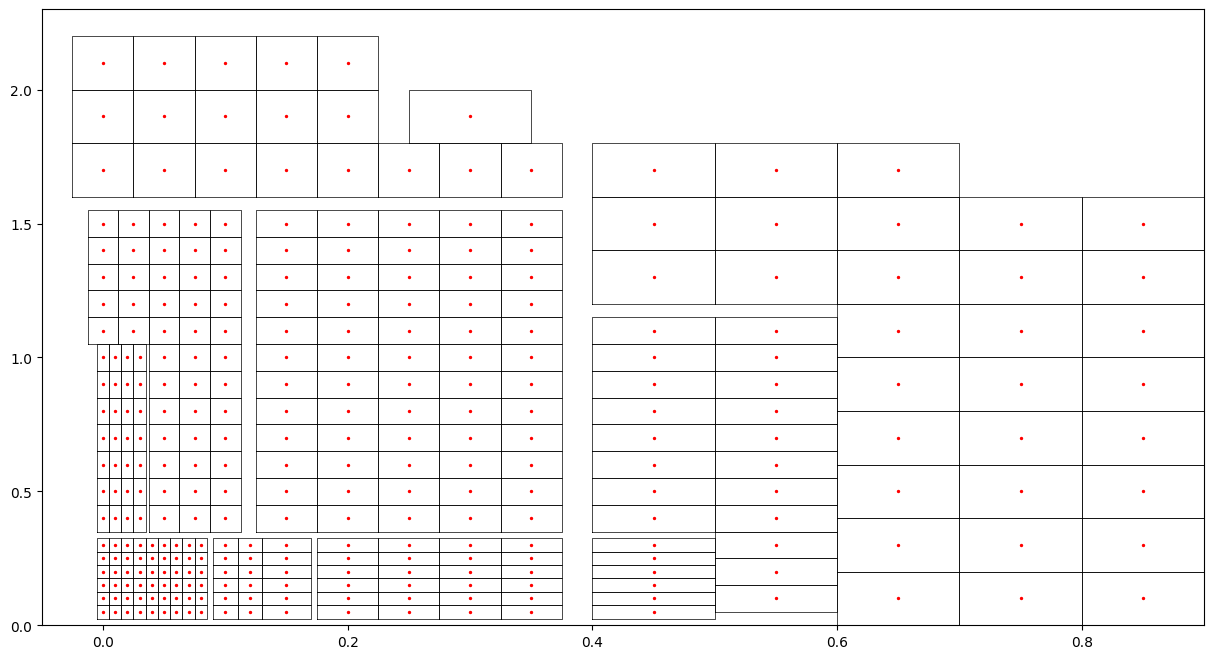

In [334]:
from matplotlib import patches

plt.figure(figsize=(15, 8))

for bin in bins:

    x = bin[0] - bin[2]
    y = bin[1] - bin[3]
    w = 2 * bin[2]
    h = 2 * bin[3]

    plt.plot([x, x, x + w, x + w, x], [y, y + h, y + h, y, y], color='black', lw=0.5)
    plt.scatter(x + w / 2, y + h / 2, color='red', s=2)

plt.xlim(-0.05, 0.9)
plt.ylim(0, 2.3)

plt.show()

> ## $\pi^{+}$ differential cross sectciont comparesment

In [335]:
id = 211

In [336]:
data = pd.read_csv(f'data/generated/{id}.csv')
ref = pd.read_csv(f'data/experimental/{id}.csv')

In [337]:
xsect = []

for bin in bins:

    xF = bin[0]
    pT = bin[1]

    dxF = bin[2]
    dpT = bin[3]

    mask_for_bin = (data['xF'] > xF - dxF / 2) * (data['xF'] < xF + dxF / 2) * (data['pT'] > pT - dpT / 2) * (data['pT'] < pT + dpT / 2)

    dn = data[mask_for_bin]['E'].size

    dp3 = dxF * 2 * pT * dpT

    E = data[mask_for_bin]['E']

    xsect.append(E.mean() * (sig_total / N_events) * (dn / dp3))

xsect = np.where(np.isnan(xsect), 0, xsect)

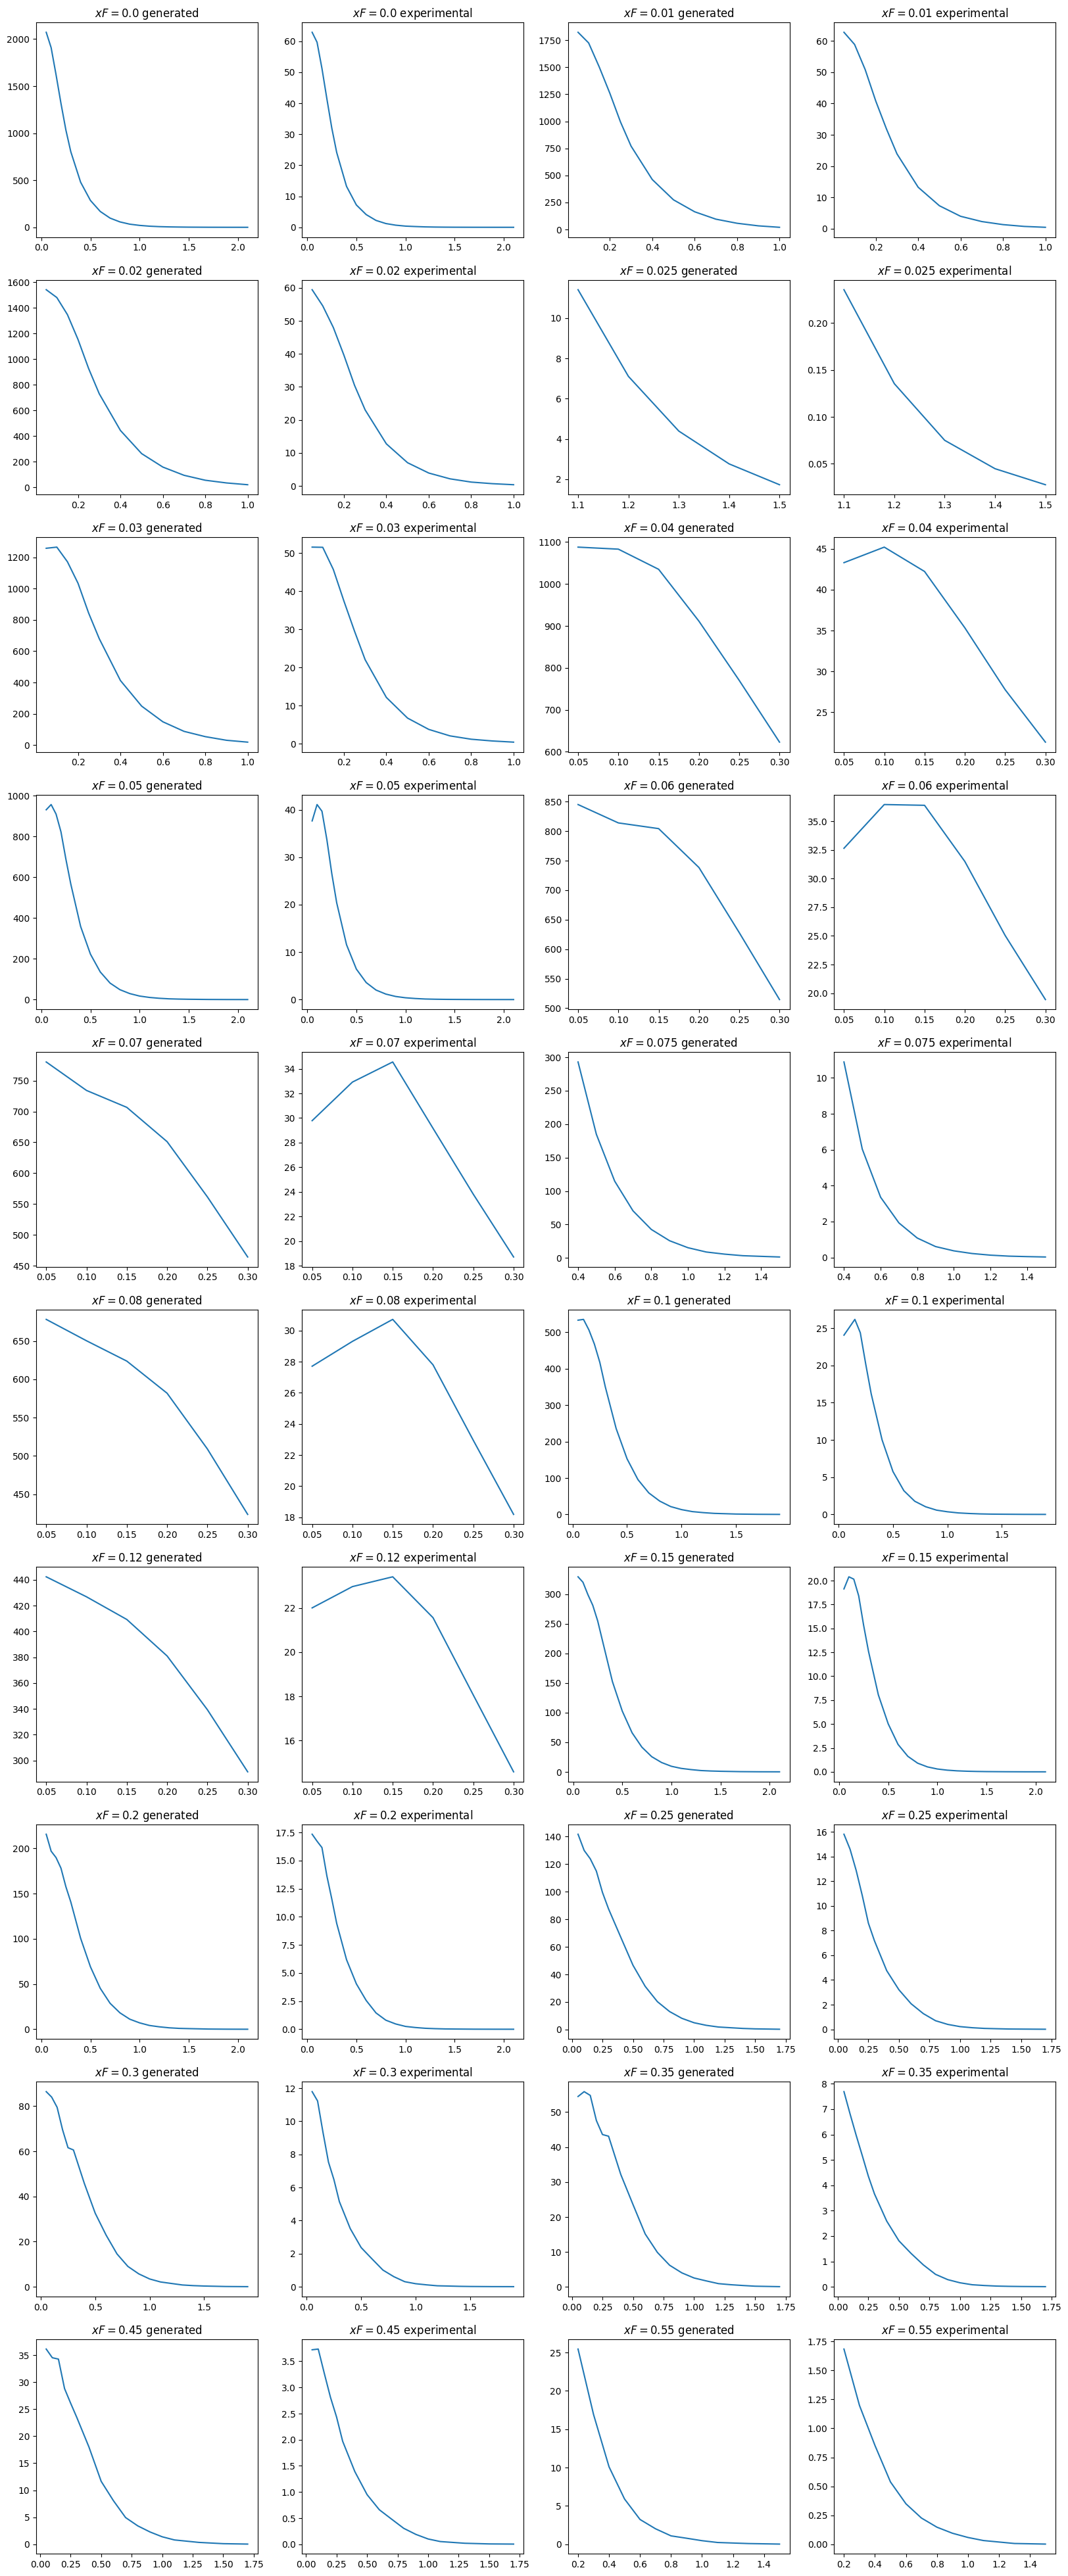

In [338]:
plt.figure(figsize=(20, 50))

for num, xF in enumerate(ref['xF'].unique()):

    pT_axis = np.intersect1d(bins[:, 1][bins[:, 0] == xF][::-1], ref['pT'][ref['xF'] == xF])

    plt.subplot(10, 4, 2 * num + 1)
    plt.plot(pT_axis, xsect[(bins[:, 0] == xF) * np.isin(bins[:, 1], pT_axis)][::-1])
    plt.title(f'$xF={xF}$ generated')

    plt.subplot(10, 4, 2 * num + 2)
    plt.plot(pT_axis, ref['xsect'][(ref['xF'] == xF) * np.isin(ref['pT'], pT_axis)])
    plt.title(f'$xF={xF}$ experimental')

plt.show()

> ## $\pi^{-}$ differential cross sectciont comparesment

In [339]:
id = -211

In [340]:
data = pd.read_csv(f'data/generated/{id}.csv')
ref = pd.read_csv(f'data/experimental/{id}.csv')

In [341]:
xsect = []

for bin in bins:

    xF = bin[0]
    pT = bin[1]

    dxF = bin[2]
    dpT = bin[3]

    mask_for_bin = (data['xF'] > xF - dxF / 2) * (data['xF'] < xF + dxF / 2) * (data['pT'] > pT - dpT / 2) * (data['pT'] < pT + dpT / 2)

    dn = data[mask_for_bin]['E'].size

    dp3 = dxF * 2 * pT * dpT

    E = data[mask_for_bin]['E']

    xsect.append(E.mean() * (sig_total / N_events) * (dn / dp3))

xsect = np.where(np.isnan(xsect), 0, xsect)

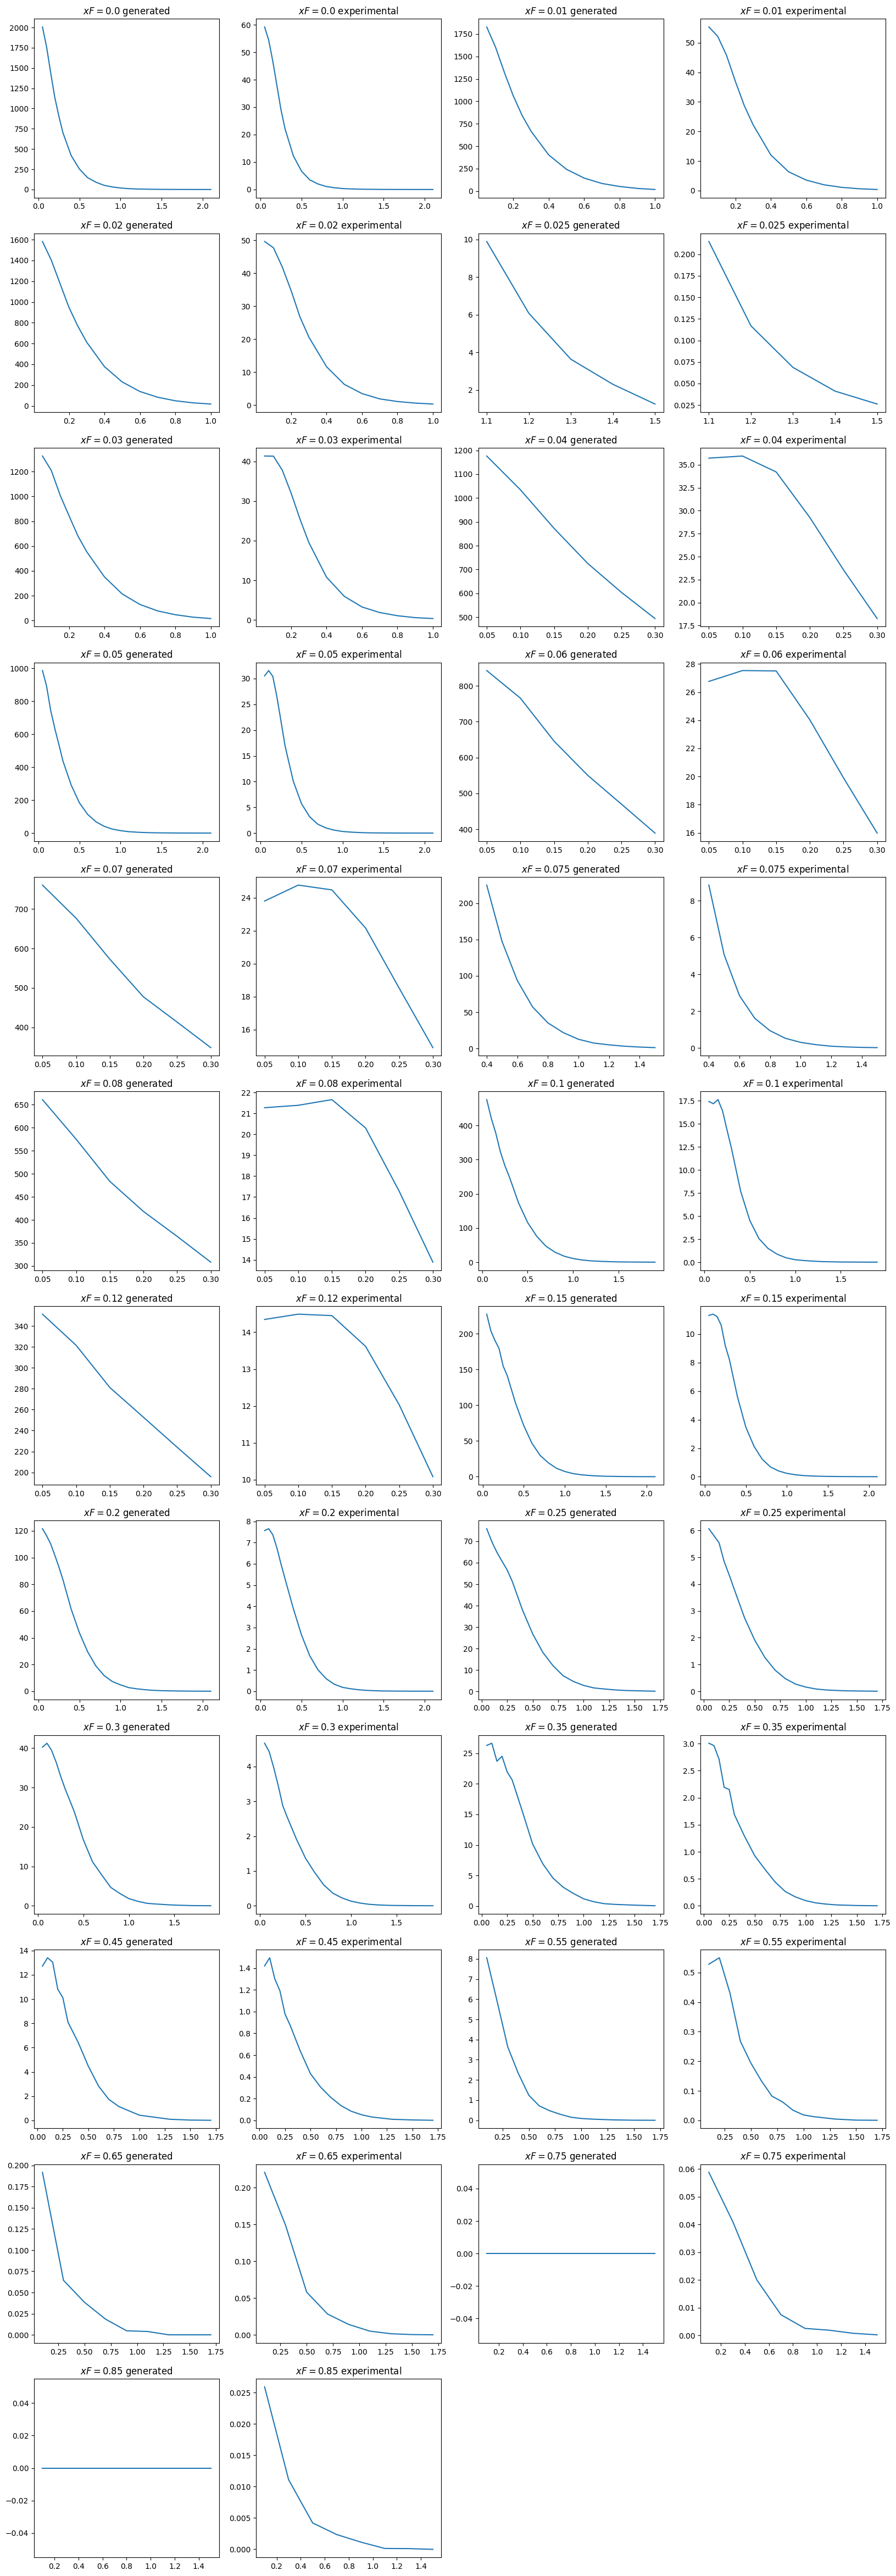

In [342]:
plt.figure(figsize=(20, 60))

for num, xF in enumerate(ref['xF'].unique()):

    pT_axis = np.intersect1d(bins[:, 1][bins[:, 0] == xF][::-1], ref['pT'][ref['xF'] == xF])

    plt.subplot(12, 4, 2 * num + 1)
    plt.plot(pT_axis, xsect[(bins[:, 0] == xF) * np.isin(bins[:, 1], pT_axis)][::-1])
    plt.title(f'$xF={xF}$ generated')

    plt.subplot(12, 4, 2 * num + 2)
    plt.plot(pT_axis, ref['xsect'][(ref['xF'] == xF) * np.isin(ref['pT'], pT_axis)])
    plt.title(f'$xF={xF}$ experimental')

plt.show()

> ## $K^{+}$ differential cross sectciont comparesment

In [343]:
id = 321

In [344]:
data = pd.read_csv(f'data/generated/{id}.csv')
ref = pd.read_csv(f'data/experimental/{id}.csv')

In [345]:
xsect = []

for bin in bins:

    xF = bin[0]
    pT = bin[1]

    dxF = bin[2]
    dpT = bin[3]

    mask_for_bin = (data['xF'] > xF - dxF / 2) * (data['xF'] < xF + dxF / 2) * (data['pT'] > pT - dpT / 2) * (data['pT'] < pT + dpT / 2)

    dn = data[mask_for_bin]['E'].size

    dp3 = dxF * 2 * pT * dpT

    E = data[mask_for_bin]['E']

    xsect.append(E.mean() * (sig_total / N_events) * (dn / dp3))

xsect = np.where(np.isnan(xsect), 0, xsect)

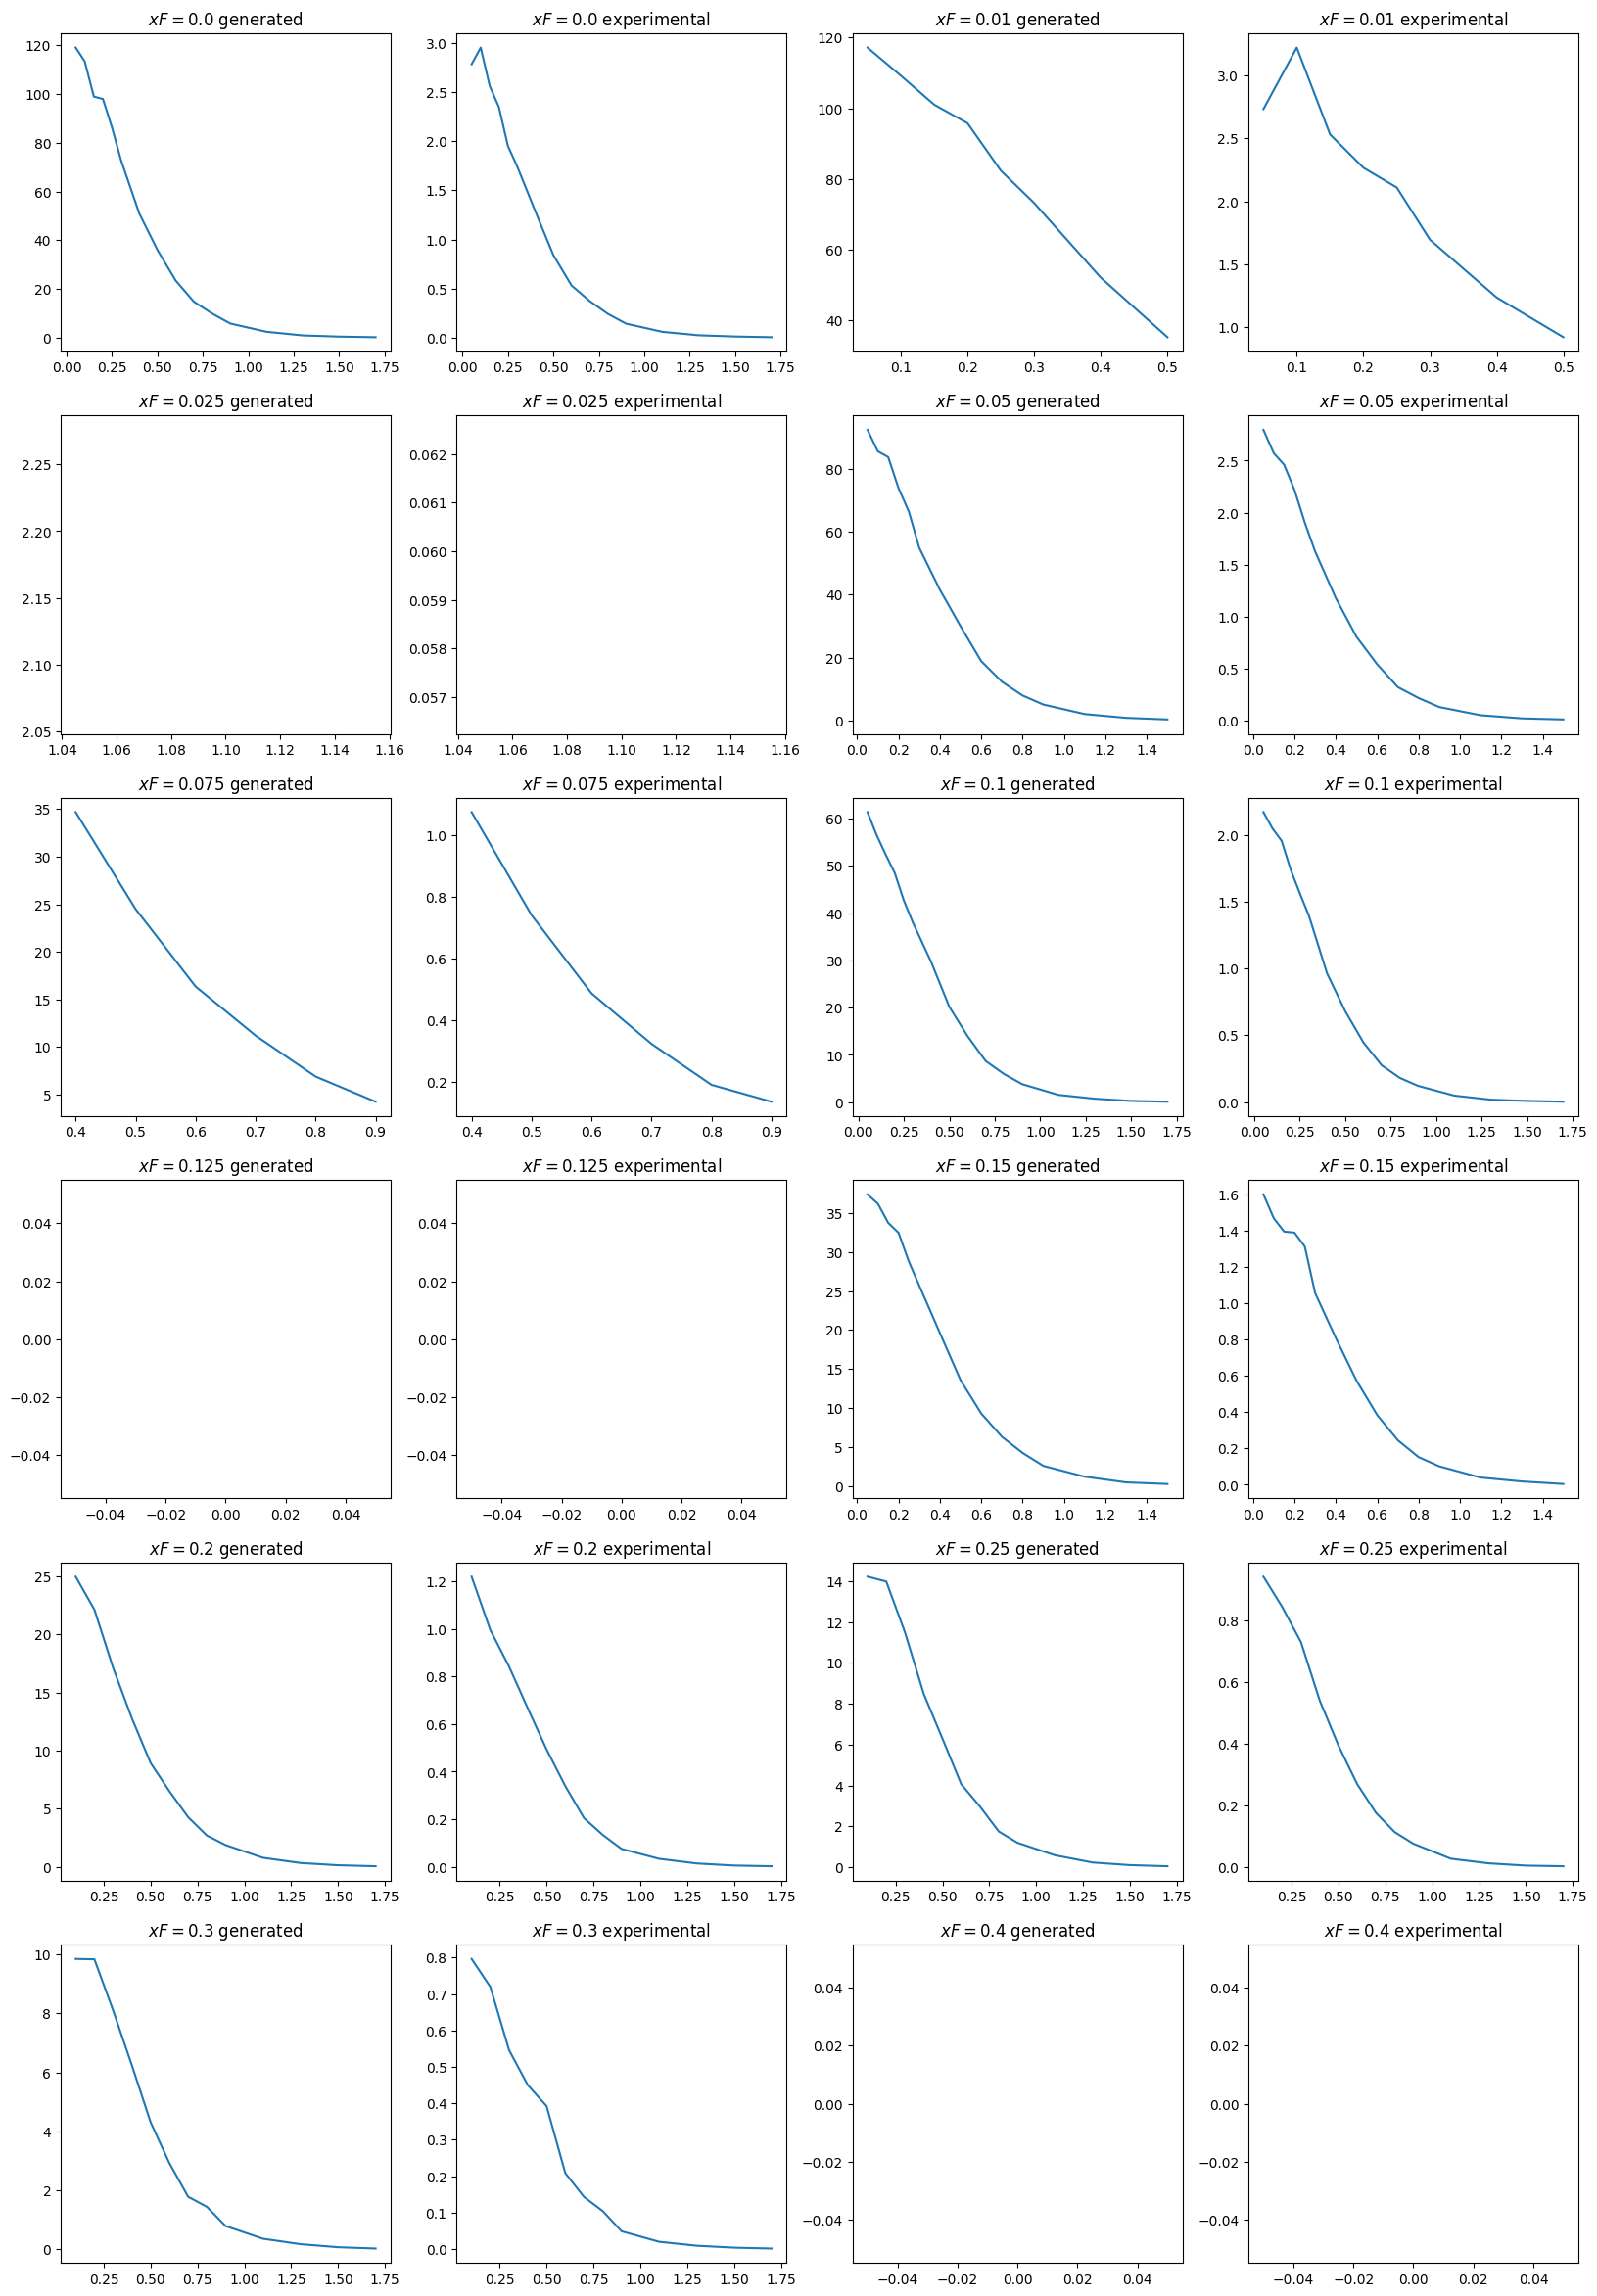

In [346]:
plt.figure(figsize=(20, 60))

for num, xF in enumerate(ref['xF'].unique()):

    pT_axis = np.intersect1d(bins[:, 1][bins[:, 0] == xF][::-1], ref['pT'][ref['xF'] == xF])

    plt.subplot(12, 4, 2 * num + 1)
    plt.plot(pT_axis, xsect[(bins[:, 0] == xF) * np.isin(bins[:, 1], pT_axis)][::-1])
    plt.title(f'$xF={xF}$ generated')

    plt.subplot(12, 4, 2 * num + 2)
    plt.plot(pT_axis, ref['xsect'][(ref['xF'] == xF) * np.isin(ref['pT'], pT_axis)])
    plt.title(f'$xF={xF}$ experimental')

plt.show()

> ## $K^{-}$ differential cross sectciont comparesment

In [347]:
id = -321

In [348]:
data = pd.read_csv(f'data/generated/{id}.csv')
ref = pd.read_csv(f'data/experimental/{id}.csv')

In [349]:
xsect = []

for bin in bins:

    xF = bin[0]
    pT = bin[1]

    dxF = bin[2]
    dpT = bin[3]

    mask_for_bin = (data['xF'] > xF - dxF / 2) * (data['xF'] < xF + dxF / 2) * (data['pT'] > pT - dpT / 2) * (data['pT'] < pT + dpT / 2)

    dn = data[mask_for_bin]['E'].size

    dp3 = dxF * 2 * pT * dpT

    E = data[mask_for_bin]['E']

    xsect.append(E.mean() * (sig_total / N_events) * (dn / dp3))

xsect = np.where(np.isnan(xsect), 0, xsect)

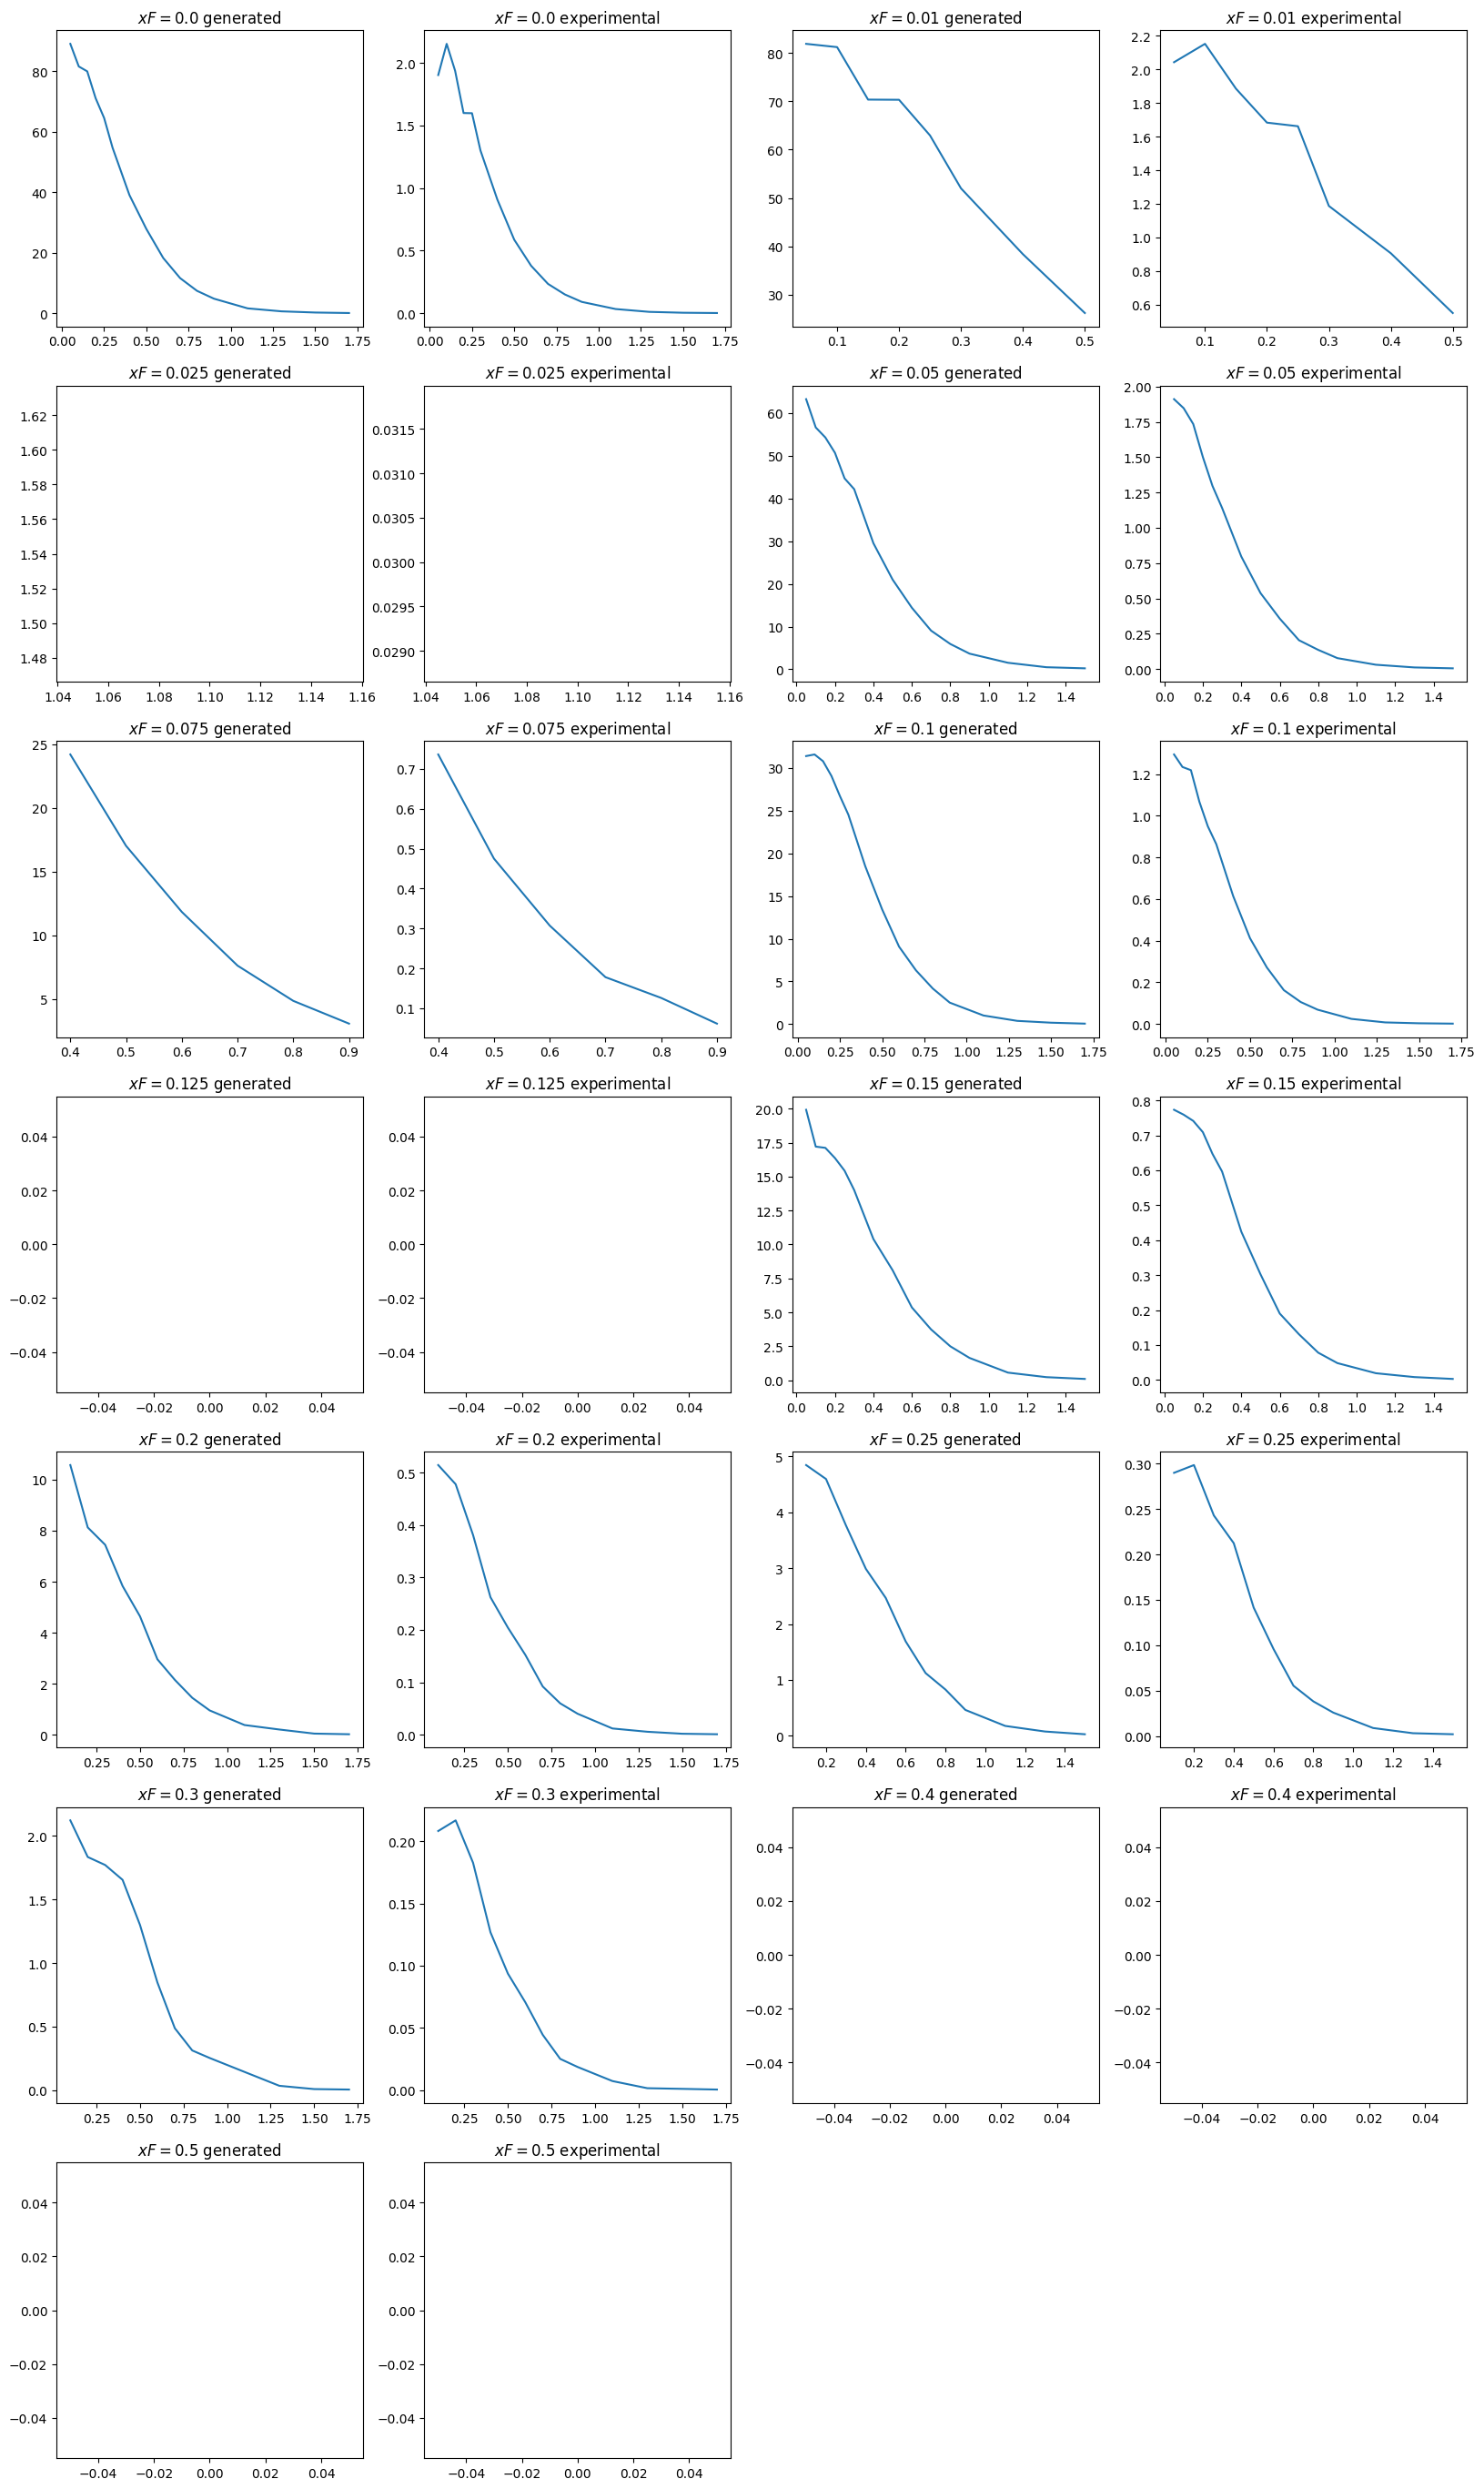

In [350]:
plt.figure(figsize=(20, 60))

for num, xF in enumerate(ref['xF'].unique()):

    pT_axis = np.intersect1d(bins[:, 1][bins[:, 0] == xF][::-1], ref['pT'][ref['xF'] == xF])

    plt.subplot(12, 4, 2 * num + 1)
    plt.plot(pT_axis, xsect[(bins[:, 0] == xF) * np.isin(bins[:, 1], pT_axis)][::-1])
    plt.title(f'$xF={xF}$ generated')

    plt.subplot(12, 4, 2 * num + 2)
    plt.plot(pT_axis, ref['xsect'][(ref['xF'] == xF) * np.isin(ref['pT'], pT_axis)])
    plt.title(f'$xF={xF}$ experimental')

plt.show()